# A Study of Distant Viewing Ukiyo-e Prints
* The code in this notebook complements an article to be presented in LREC 2022.
* It is based on the code created by [Chatzipanagiotou et al. (2021)](https://dl.acm.org/doi/10.1145/3526242.3526254). 
* Only parts related to spAcy will be shown here.

***spaCy*** is a free and open-source library for Natural Language Processing (NLP) in Python

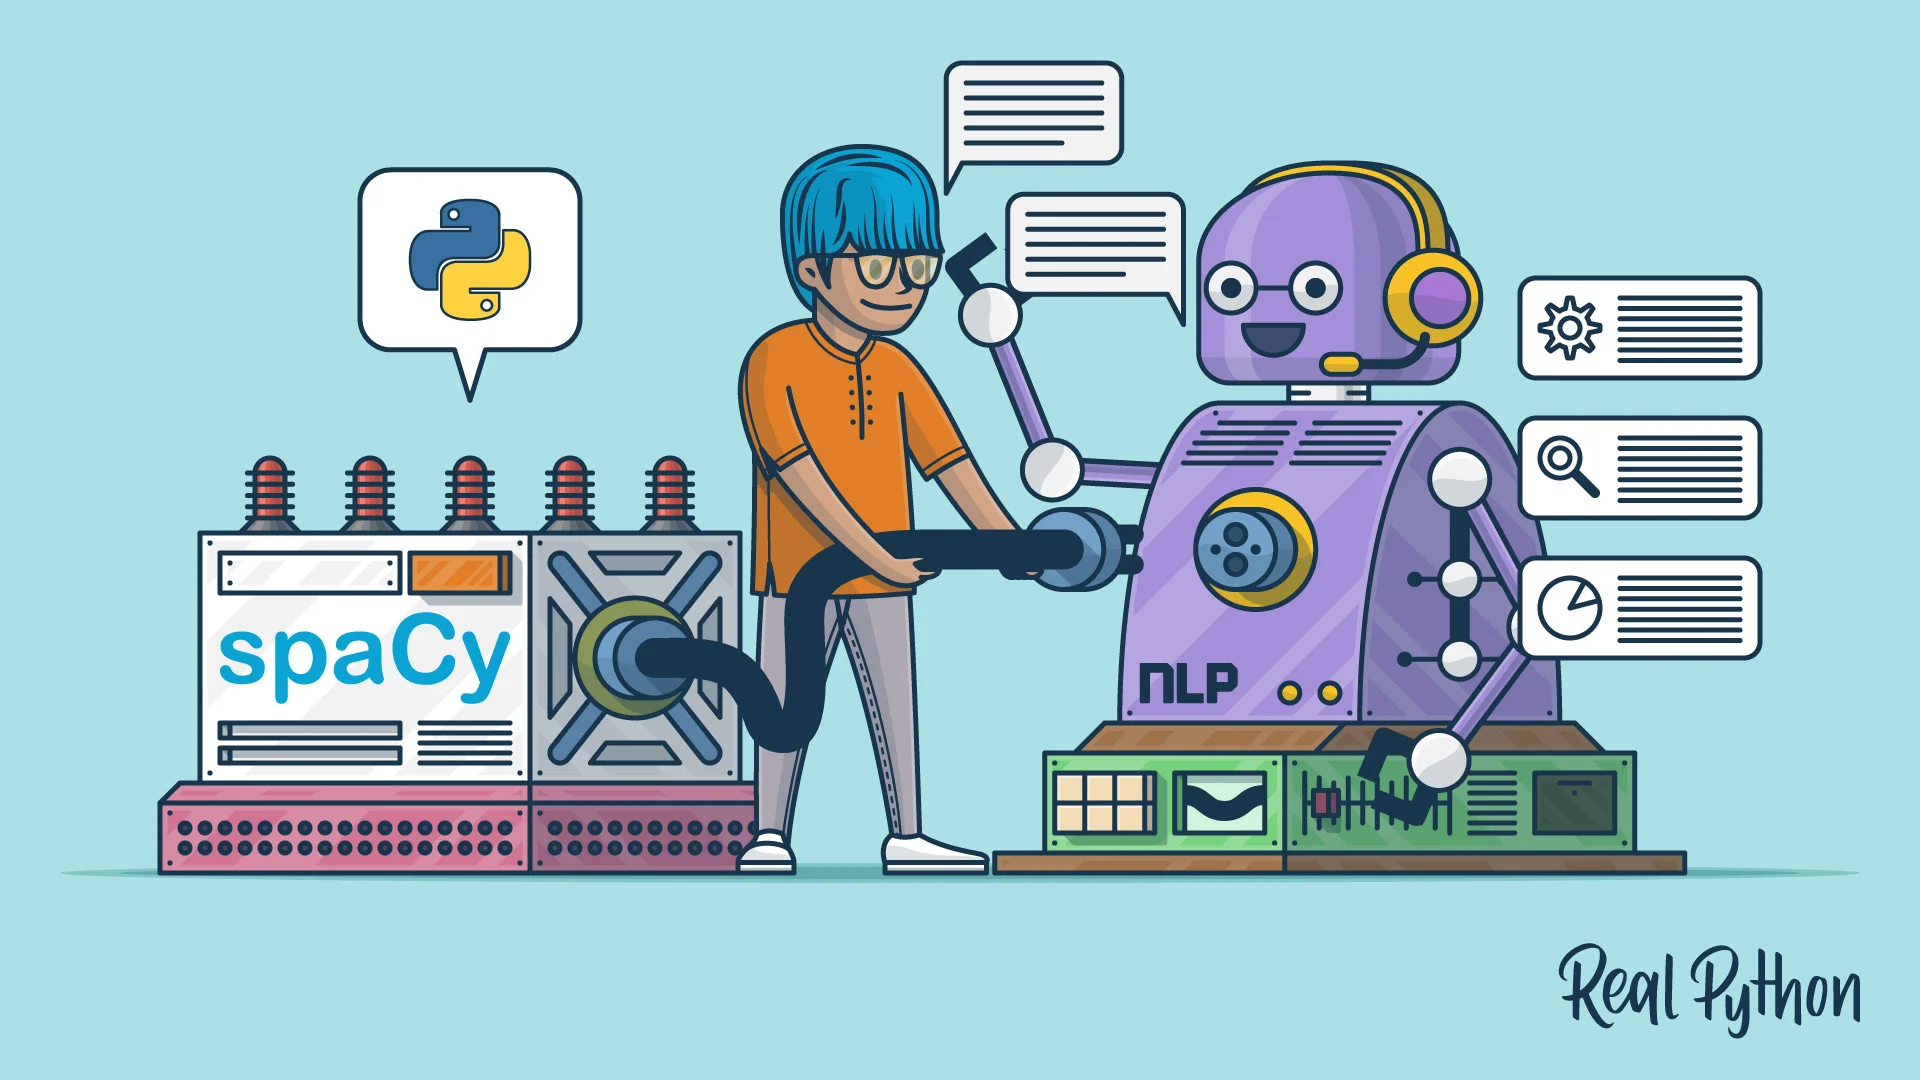

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


### **Import Data**

In [ ]:
%%capture
!gdown --id 1UHWXRKsqoGdWkxqkBhKF7gpYNAfxuKIO && unzip ukiyo-e.zip

In [ ]:
import pandas as pd

# read excel files as Dataframe
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

In [ ]:
# random module that returns n length list of items chosen from the dataframe
train_data.sample(2)

,Title,Genre,Artist,Image URL,Permalink
12,「東海道名所」 「京洛中ノ内」「五条橋」,名所絵,芳盛,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.dh-jac.net/db/nishikie/arcUP1741/2...
75,「平安諸大家名所画譜ニ」「第二景文筆鳳凰堂之図」,京都関連,景文,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.dh-jac.net/db/nishikie/arcUP2356/2...


In [ ]:
# the empty space is not good enough for tokenisation
train_data['totalwords'] = train_data['Title'].str.split().str.len()
print(f"avg # words: {train_data['totalwords'].mean()}, total # words: {train_data['totalwords'].mean()}")

avg # words: 1.9108910891089108, total # words: 1.9108910891089108


SpaCy requires the training data to be in the the following format:

`(TEXT, {"entities": [(start_position,end_position,TAG_NAME),(start_position,end_position,TAG_NAME),.....]})`

For instance, ("「東海道五十三次」  「三十八」「藤川」",{"entities":[(1,4,"LOC"),(17,19,"GPE")]})

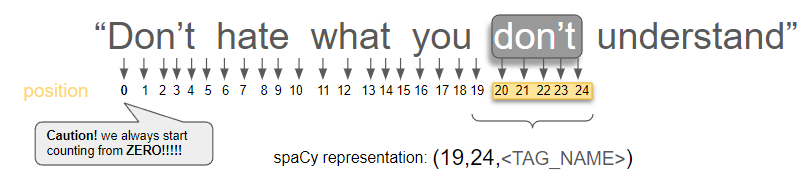

In [ ]:
TEST_DATA = [("「東海道五十三次」  「三十八」「藤川」",{"entities":[(1,4,"LOC"),(17,19,"GPE")]}),
        ("「東都六玉顔ノ内」  「角田川」",{"entities":[(1,3,"GPE"),(12,15,"LOC")]}),
        ("「名所江戸百景」  「猿わか町よるの景」",{"entities":[(3,5,"GPE"),(11,15,"GPE")]}),
        ("「江戸名所図会」  「卅二」「三十三間堂」「曽我五郎時宗」",{"entities":[(1,3,"GPE"),(15,20,"GPE")]}),
        ("「江戸名所　百人美女」  「今川はし」",{"entities":[(1,3,"GPE"),(14,18,"GPE")]}),
        (" 「東海道五十三次の内」  「戸塚藤沢間」「吉田橋」「松若」",{"entities":[(2,4,"LOC"),(15,19,"GPE"),(22,25,"GPE"),(27,29,"GPE")]}),
        (" 「江戸名所百人美女」  「今戸」",{"entities":[(2,4,"GPE"),(14,16,"GPE")]}),
        ("「東都高名会席尽」  「金子」「助六」",{"entities":[(1,3,"GPE")]}),
        (" 「木曽六十九駅」  「草津」「野路玉川」「清玄尼」",{"entities":[(2,4,"LOC"),(12,14,"GPE"),(16,20,"LOC")]}),
        (" 「東海道」 「程ケ谷戸塚間」「権太坂」「いがみ」",{"entities":[(2,5,"LOC"),(8,13,"GPE"),(16,19,"GPE")]}),
        (" 「両国夕景一ツ目千金」",{"entities":[(2,4,"LOC"),(9,11,"GPE")]}),
        ("「見立八景之内」  「清水寺の晩鐘」「清玄阿闍梨」「入間の息女桜姫」",{"entities":[(11,14,"GPE")]}),
        (" 「江戸自慢三十六興」  「落合　ほたる」",{"entities":[(2,4,"GPE"),(14,16,"GPE")]}),
        (" 「曽我八景自筆鏡」  「十郎祐成」「曽我中村」",{"entities":[(2,4,"GPE")]}),
        (" 「東海道五十三次之内」  「御油」「其二」「山本勘助母」",{"entities":[(2,5,"LOC"),(15,17,"GPE")]}),
        ("「東海道」「大津三井寺」",{"entities":[(1,4,"LOC"),(6,11,"GPE")]}),
        ("「王城加茂社風景」",{"entities":[(3,6,"GPE")]}),
        ("「東海道名所之内」  「深草乃里」「少将つか」「せう／＼さくら」「元政寺」",{"entities":[(1,4,"LOC"),(12,16,"GPE"),(33,36,"GPE")]}),
        ("「東海道名所之内」  「淀川」",{"entities":[(1,4,"LOC"),(12,14,"LOC")]}),
        ("「東京三芝居町繁栄之図」",{"entities":[(1,3,"GPE"),(4,6,"GPE")]}),
        ("「津島牛頭天王」「舟発場」「佐屋川」「本陣」",{"entities":[(1,3,"GPE"),(14,17,"LOC"),(19,21,"LOC")]}),
        (" 「東海道」  「浜松」",{"entities":[(2,5,"LOC"),(9,11,"GPE")]}),(" 「東海道之内」  「岡部」",{"entities":[(2,5,"LOC"),(11,13,"GPE")]}),
        (" 「東海道名所之内」  「豊川」",{"entities":[(2,5,"GPE"),(13,15,"GPE")]}),
        ("［川口善光寺開帳参詣之図］",{"entities":[(1,6,"GPE")]}),
        (" 「東海道」  「島田」",{"entities":[(2,5,"LOC"),(9,11,"GPE")]}),
        ("「浅草金竜山之図」",{"entities":[(1,6,"GPE")]}),
        ("「東京名所の内」  「浅草区金竜山浅草寺境内一覧」",{"entities":[(1,3,"GPE"),(11,20,"GPE")]}),
        (" 「しん板車づくし」  「横浜鉄道図」",{"entities":[(13,15,"GPE")]}),
        (" 「東都名所高輪行粧之図」",{"entities":[(2,4,"GPE"),(6,8,"GPE")]}),
        (" 「東都名所」  「隅田川花盛」",{"entities":[(2,4,"GPE"),(10,13,"LOC")]}),
        (" 「江戸の花名勝会」  「り」「十番組」「一ツ家の賤の女　尾上菊次郎」「浅茅が原衣掛松」",{"entities":[(2,4,"GPE"),(36,40,"GPE")]}),
        ("「江戸の花名勝会」  「ち」「十番組」「一ツ家の姥　市川海老蔵」「猿若芝居町」",{"entities":[(1,3,"GPE"),(33,38,"GPE")]}),
        (" 「東京三十六景」  「十五」「両国」「十六」「本所一ツ目之橋」",{"entities":[(2,4,"GPE"),(16,18,"GPE"),(26,31,"GPE")]}),
        (" 「東京十二月之内」  「二月」「亀井戸天神」「亀井戸梅林」",{"entities":[(2,4,"GPE"),(17,22,"GPE"),(24,29,"GPE")]}),
        (" 「東京十二月之内」  「四月」「品川沖之景」",{"entities":[(2,4,"GPE"),(17,19,"GPE")]}),
        (" 「東京十二月之内」  「六月」「愛宕之景」「神田神社」",{"entities":[(2,4,"GPE"),(17,19,"GPE"),(23,27,"GPE")]}),
        ("「東京開化名所」  「三代徳川家光公」「三河島之景」",{"entities":[(1,3,"GPE"),(20,23,"GPE")]}),
        (" 「東京名所競」  「上野東照宮」",{"entities":[(2,4,"GPE"),(11,16,"GPE")]}),
        ("「東京銘勝会」  「不忍の競馬」",{"entities":[(1,3,"GPE"),(10,15,"GPE")]}),
        (" 「東海道」  「土山」「鈴ヶ山坂ノ下」",{"entities":[(2,5,"LOC"),(9,11,"GPE"),(13,19,"GPE")]}),
        ("「堀切花菖蒲」",{"entities":[(1,6,"GPE")]}),
        (" 「両国花火之図」",{"entities":[(2,4,"GPE")]}),
        (" 「亀戸梅屋敷」",{"entities":[(1,6,"GPE")]}),
        ("「東京十二月之内」  「一月」「宮城之春」「九段坂」",{"entities":[(1,3,"GPE"),(16,20,"LOC"),(24,27,"GPE")]}),
        (" 「見立十二支」  「丑」「向島」「牛島神社」",{"entities":[(14,16,"GPE"),(18,22,"GPE")]}),
        ("「見立十二支」  「辰」「深川八幡」「富士」",{"entities":[(13,17,"GPE"),(19,21,"LOC")]}),
        (" 「見立十二支」  「酉」「浅草田甫酉の市」",{"entities":[(14,18,"GPE")]}),
        (" 「東海道五拾三次之内」  「大尾」「京師」「三条大橋」",{"entities":[(2,5,"LOC"),(19,21,"GPE"),(23,27,"GPE")]}),
        (" 「東海道五拾三次之内」  「日本橋」「行烈振出」",{"entities":[(2,5,"LOC"),(15,18,"LOC")]}),
        (" 「東海道五拾三次之内」  「四日市」「三重川」",{"entities":[(2,5,"LOC"),(15,18,"GPE"),(20,23,"LOC")]}),
        (" 「東海道五拾三次之内」  「大津」「走井茶屋」",{"entities":[(2,5,"GPE"),(15,17,"GPE"),(19,21,"GPE")]}),
        (" 「東海道五拾三次之内」  「平塚」「縄手道」",{"entities":[(2,5,"LOC"),(15,17,"GPE"),(19,22,"LOC")]}),
        (" 「東海道五拾三次之内」  「土山」「春之雨」",{"entities":[(2,5,"LOC"),(15,17,"GPE")]}),
        (" 「東海道五拾三次之内」  「日坂」「佐夜ノ中山」",{"entities":[(2,5,"LOC"),(15,17,"GPE"),(19,24,"LOC")]}),
        ("「東海道五拾三次之内」  「庄野」「白雨」",{"entities":[(2,5,"LOC"),(15,17,"GPE")]}),
        (" 「江戸名所」  「両国花火」",{"entities":[(2,4,"GPE"),(10,12,"GPE")]}),
        (" 「江戸名所」  「芝増上寺前の景」",{"entities":[(2,4,"GPE"),(11,14,"GPE")]}),
        (" 「東都名所」  「新吉原五丁町弥生花盛全図」",{"entities":[(2,4,"GPE"),(10,16,"GPE")]}),
        (" 「東海道五拾三次之内」  「袋井」「出茶屋ノ図」",{"entities":[(2,5,"LOC"),(15,17,"GPE"),(19,22,"GPE")]}),
        ("［江都名所浅草観音の図］",{"entities":[(1,3,"GPE"),(5,9,"GPE")]}),
        ("「東京市中馬車往来之図」",{"entities":[(1,3,"GPE")]}),
        ("［東京海運橋兜町為換座五階造リ図］",{"entities":[(1,8,"GPE")]}),
        ("［久松町劇場久松座繁栄図］",{"entities":[(1,4,"GPE")]}),
        ("「東京名所」  「スジカイ　万代橋」",{"entities":[(1,3,"GPE"),(14,17,"GPE")]}),
        ("「東京名所之内」  「高輪海岸鉄道の図」",{"entities":[(1,3,"GPE"),(11,15,"GPE")]}),
        (" 「東海道五拾三次之内」  「原」「朝之富士」",{"entities":[(2,5,"LOC"),(15,16,"GPE"),(20,22,"LOC")]}),
        ("「横浜名所図会」  「野毛山下蒸気車」",{"entities":[(1,3,"GPE"),(11,14,"LOC")]}),
        ("「東京名所之内」  「上野公園清水堂」",{"entities":[(1,3,"GPE"),(11,18,"GPE")]}),
        ("「東海道五拾三次之内」  「見附」「天竜川図」",{"entities":[(1,4,"LOC"),(14,16,"GPE"),(18,22,"GPE")]}),
        ("「東京開化三十六景」  「柳橋より浅草橋」",{"entities":[(1,3,"GPE"),(13,15,"GPE"),(17,20,"GPE")]}),
        ("「東京名所之内」  「浅草金竜山」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),
        ("「伊勢名所」「伊勢土産名所図画」  「二見浦之景」「賓日館及海水景」「六」",{"entities":[(1,3,"GPE"),(19,22,"GPE"),(26,32,"GPE")]}),
        ("「大和名所」  「大仏殿」",{"entities":[(1,3,"GPE"),(10,13,"GPE")]}),
        ("「大和名所」  「春日神社」「若草山」",{"entities":[(1,3,"GPE"),(9,13,"GPE"),(15,18,"LOC")]}),
        ("「府県名所図会」  「兵庫県」「神戸布引滝」「県庁之位地　八部郡神戸」",{"entities":[(11,14,"GPE"),(16,21,"GPE"),(29,34,"GPE")]}),
        (" 「神田御社眺望」",{"entities":[(2,6,"GPE")]}),
        (" 「大阪名所」  「桜乃宮より造幣局を望む」「天神橋之図」「造幣局」",{"entities":[(2,4,"GPE"),(10,13,"GPE"),(23,26,"GPE"),(30,33,"GPE")]}),
        (" 「東海道之内」  「関」",{"entities":[(2,5,"LOC")]}),
        ("「観音霊験記」  「秩父順礼廿九番」「笹の戸　見目山　長泉院」",{"entities":[(19,30,"GPE")]}),
        ("［東京三井組ハウス］",{"entities":[(1,9,"GPE")]}),
        ("「東京名所　浅草観音之図」",{"entities":[(1,3,"GPE"),(6,10,"GPE")]}),
        (" 「名所江戸百景」  「鎧の渡し　小網町」",{"entities":[(4,6,"GPE"),(16,20,"GPE")]}),
        ("「諸国滝廻リ」  「木曽海道　小野ノ瀑布」",{"entities":[(10,14,"LOC")]}),
        ("「五十三次名所図会」「丗二」  「あら井　渡舟着岸御関所」",{"entities":[(17,20,"GPE")]}),
        ("「五十三次名所図会　四十」「池鯉鮒　八ツ橋むら　杜若の古せき」",{"entities":[(14,23,"GPE")]}),
        ("「五十三次名所図会」「丗八」  「藤川　山中の里別名宮路山」",{"entities":[(17,19,"GPE"),(20,24,"GPE"),(26,29,"LOC")]}),
        ("「川崎」  「神奈川へ二リ半」",{"entities":[(1,3,"LOC"),(7,10,"GPE")]}),
        ("「江都名所」  「洲崎しほ干狩」",{"entities":[(1,3,"GPE"),(9,11,"GPE")]}),
        ("「諸国名橋奇覧」  「摂州安治川口天保山」",{"entities":[(11,20,"LOC")]}),
        ("「東都名所」  「永代橋深川新地」",{"entities":[(1,3,"GPE"),(9,16,"GPE")]}),
        ("「五十三次名所図会」「一」  「日本橋　東雲の景",{"entities":[(17,20,"GPE")]}),
        ("「五十三次名所図会」「六」  「戸塚山道より不二眺望」",{"entities":[(16,20,"LOC"),(22,24,"LOC")]}),
        ("「富士三十六景」  「東都佃沖」",{"entities":[(1,3,"LOC"),(11,14,"GPE")]}),
        ("「江戸名所之内」  「真乳山」",{"entities":[(1,3,"GPE"),(11,14,"LOC")]}),
        ("「名所江戸百景」  「千住の大はし」",{"entities":[(3,5,"GPE"),(11,17,"GPE")]}),
        ("「諸国名所百景」  「遠州秋葉遠景袋井凧」",{"entities":[(13,15,"GPE"),(17,19,"GPE")]})
        ]


In [ ]:
TEST_DATA = [("「東海道　京都之内」「大内能上覧図」", {"entities":[(1,4,"LOC"),(5,7,"GPE")]}),("「東海道　京都名所之内」「四条河原」", {"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,17,"GPE")]}),("「東海道名所之内」「御能拝見之図」",{"entities":[(1,4,"LOC")]}),("「東海道」「京都  紫震殿」",{"entities":[(1,4,"LOC"),(6,8,"GPE"),(9,12,"GPE")]}),("「東海道之内」「京都参内」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),("「東海道之内」「京」「大内蹴鞠之遊覧」",{"entities":[(1,4,"LOC"),(8,9,"GPE"),(11,13,"GPE")]}),("「東海道名所之内」「上加茂」「岩本社」「三本杉」「片岡社」「楼門」「御供所」「若宮」「別雷皇太神宮」「杉尾社」「仮殿」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,18,"GPE"),(20,23,"GPE"),(25,28,"GPE"),(30,32,"GPE"),(34,37,"GPE"),(39,41,"GPE"),(43,49,"GPE"),(51,54,"GPE"),(56,58,"GPE")]}),("「東海道名所之内」「京加茂」「山科」「黒谷」「吉田山」「将軍塚」「比叡山」「比良」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,17,"LOC"),(19,21,"LOC"),(23,26,"LOC"),(28,31,"LOC"),(33,36,"LOC"),(38,40,"LOC")]}),("「東海道名所之内」「加茂の競馬」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),(" 「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」",{"entities": [(1,4,"LOC"),(10,13,"LOC"),(15,18,"LOC"),(20,25,"LOC"),(27,30,"GPE")]}),("「東海道名所之内」「祇園祭礼」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),("「東海道 京都名所之内」「島原」",{"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,15,"GPE")]}),("「東海道名所」「京洛中ノ内」「五条橋」",{"entities": [(1,4,"LOC"),(8,10,"GPE"),(15,18,"GPE")]}),("「東海道名所之内」「京都等持院足利十五代木像之図」",{"entities":[(1,4,"LOC"),(10,12,"GPE"),(12,15,"GPE")]}),("「東海道名所つゝき」「羅生門之古図」「春雨ノ社」「金札石刀石トモ云」「鬼カミノハシラ」",{"entities":[(1,4,"LOC"),(11,14,"GPE"),(19,23,"GPE")]}),("「東海道之内」「京都御出立」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),(" 「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(21,26,"GPE"),(28,31,"GPE"),(33,36,"GPE"),(38,43,"GPE"),(45,48,"GPE")]}),("「東海道名所之内」「宇治」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),("「二見浦」",{"entities":[(1,4,"LOC")]}),("「長谷川貞信筆　都名所写真鏡　上篇」",{"entities":[(7,8,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"LOC"),(27,30,"LOC")]}),(" 「都名所之内」「知恩院本堂に傘を見る",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「伏見稲荷社」", { "entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「高台寺秋ノ景」",{"entities":[(1,2,"GPE"),(8,11,"LOC")]}),("「都名所之内」「東福寺通天橋」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「西大谷目鏡橋」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「音羽山清水寺」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「祇園大鳥居」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「四条橋より縄手通大和橋を望」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(13,19,"GPE")]}),("「都名所之内」「如意嶽大文字」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「比叡山山上より湖水を望」「三上山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(21,24,"LOC")]}),("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「北野天満宮境内」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「金閣寺雪景」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「妙心寺雪江松」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「御室仁和寺花盛」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"LOC"),(27,30,"LOC")]}),("「都名所之内」「高雄奥の院庭中」「清滝川」",{"entities":[(1,2,"GPE"),(8,10,"GPE"),(17,20,"LOC")]}),("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「愛宕山之図」「清滝川」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(15,18,"LOC")]}),("「都名所之内」「嵐山 三軒家より眺望」「となせの滝」",{"entities":[(1,2,"GPE"),(8,10,"LOC"),(11,14,"GPE"),(20,25,"GPE")]}),("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),("「京都名所之内」「金閣寺」",{"entities":[(1,2,"GPE"),(9,12,"GPE")]}),("「滑稽都名所」「三十三間堂」",{"entities":[(3,4,"GPE"),(8,13,"GPE")]}),("「滑稽都名所」「黒谷」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「銀閣寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「滑稽都名所」「耳塚」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「東寺」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「真葛原」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「滑稽都名所」「内裏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「大仏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「平野」",{"entities":[(3,4,"GPE"),(8,10,"LOC")]}),("「滑稽都名所」「鞍馬山」",{"entities":[(3,4,"GPE"),(8,11,"LOC")]}),("「滑稽都名所」「広沢」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「竜安寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「諸国名所百景」「京都祇園祭礼」",{"entities":[(9,11,"GPE")]}),("「京洛名所」「二条橋より大文字を望む」",{"entities":[(1,3,"GPE"),(7,10,"GPE"),(12,15,"GPE")]}),("「東福寺通天橋」",{"entities":[(1,7,"GPE")]}),("「祇園春宵」",{"entities":[(1,3,"GPE")]}),("「京都大仏殿大鐘楼」",{"entities":[(1,3,"GPE"),(3,6,"GPE"),(6,9,"GPE")]}),("「大文字山」",{"entities":[(1,5,"LOC")]}),("「銀閣寺新緑」",{"entities":[(1,4,"GPE")]}),("「島原大門出口ノ柳」",{"entities":[(1,5,"GPE")]}),("「三十三間堂」",{"entities":[(1,6,"GPE")]}),("「嵐山渡月橋の夏雨」",{"entities":[(1,3,"LOC")]}),("「清水寺秋色」",{"entities":[(1,4,"GPE")]}),("「平安　諸大家名所画譜",{"entities":[(1,3,"GPE")]}),("「京都諸大家筆　平安諸大家名所画譜目録」",{"entities":[(1,3,"GPE"),(7,9,"GPE")]}),("「平安諸大家名所画譜一」「第一応挙筆宇治橋之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),("「平安諸大家名所画譜ニ」「第二景文筆鳳凰堂之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),("「江戸名所百人美女」「するがだい」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),("「江戸名所百人美女日本はし」",{"entities":[(1,3,"GPE"),(9,13,"GPE")]}),("「江戸名所百人美女」  「柳はし」",{"entities":[(1,3,"GPE"),(11,14,"GPE")]}),("「江戸名所百人美女」「鎧のわたし」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),("「江戸名所道戯盡」「二」「両国の夕立」",{"entities":[(1,3,"GPE"),(13,15,"GPE")]}),("「江戸名所道戯盡」「四」「御茶の水の釣人」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),("「江戸名所道戯盡」「五」「飛鳥山の花見」",{"entities":[(1,3,"GPE"),(13,15,"LOC")]}),("「江戸名所道外盡」「六」「不忍池」",{"entities":[(1,3,"GPE"),(13,16,"LOC")]}),("「江戸名所道化盡」「七」「新シ橋の大風」",{"entities":[(1,3,"GPE"),(13,16,"LOC")]}),("「江戸名所道外盡」「八」「隅田堤の弥生」",{"entities":[(1,3,"GPE"),(13,16,"GPE")]}),("「江戸名所道化盡」「九」「湯嶋天神の臺」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),("「江戸名所道外尽」「十」「外神田佐久間町」",{"entities":[(1,3,"GPE"),(13,20,"GPE")]}),("「江戸名所道戯盡」「十三」「鎧のわたし七夕祭」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「十四」「芝赤羽はしの雪中」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「十六」「王子狐火」",{"entities":[(1,3,"GPE")]}),("「江戸名所道化盡」「十七」「通壹丁目祇園會」",{"entities":[(1,3,"GPE"),(14,18,"GPE"),(18,20,"GPE")]}),("「江戸名所道外盡」「二十」「道灌山虫聞」",{"entities":[(1,3,"GPE"),(14,17,"LOC")]}),("「江戸名所道外盡」「廿四」「数寄屋かし」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「三十五」「吾嬬の森梅見もとり」",{"entities":[(1,3,"GPE"),(14,17,"GPE")]}),("「江戸名所張交図會」「浅草金龍山」「三囲」「雷門」「すみた川」「向嶋花屋鋪」",{"entities":[(1,3,"GPE"),(11,16,"LOC"),(18,20,"GPE"),(22,24,"GPE"),(26,30,"LOC"),(32,37,"GPE")]}),("「江戸廼花名勝會」「五番組」「ま」「赤坂」「赤坂奴凧平　尾上多見蔵」「赤坂御門外」",{"entities":[(1,3,"GPE"),(18,20,"GPE"),(22,24,"GPE"),(35,37,"GPE")]}),("「江戸の華名勝會」「五番組」「ま」「三河臺」「三河臺　氷川神社」「関東小六　市川市蔵」",{"entities":[(1,3,"GPE"),(18,21,"GPE"),(23,26,"GPE"),(27,31,"GPE")]}),("「東京名所四十八景　日本はし夕けしき」",{"entities":[(1,3,"GPE"),(10,14,"GPE")]}),("「東京名所四十八景」「神田明神社内年の市」",{"entities":[(1,3,"GPE"),(11,16,"GPE"),(16,20,"GPE")]}),("「東京名所四十八景　谷中諏訪の社廿六夜まち」",{"entities":[(1,3,"GPE"),(12,16,"GPE")]})]


In [ ]:
TRAIN_DATA = [("「東海道　京都之内」「大内能上覧図」", {"entities":[(1,4,"LOC"),(5,7,"GPE")]}),
         ("「東海道　京都名所之内」「四条河原」", {"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,17,"GPE")]}),
         ("「東海道名所之内」「御能拝見之図」",{"entities":[(1,4,"LOC")]}),
         ("「東海道」「京都  紫震殿」",{"entities":[(1,4,"LOC"),(6,8,"GPE"),(9,12,"GPE")]}),
         ("「東海道之内」「京都参内」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),
         ("「東海道之内」「京」「大内蹴鞠之遊覧」",{"entities":[(1,4,"LOC"),(8,9,"GPE"),(11,13,"GPE")]}),
         ("「東海道名所之内」「上加茂」「岩本社」「三本杉」「片岡社」「楼門」「御供所」「若宮」「別雷皇太神宮」「杉尾社」「仮殿」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,18,"GPE"),(20,23,"GPE"),(25,28,"GPE"),(30,32,"GPE"),(34,37,"GPE"),(39,41,"GPE"),(43,49,"GPE"),(51,54,"GPE"),(56,58,"GPE")]}),
         ("「東海道名所之内」「京加茂」「山科」「黒谷」「吉田山」「将軍塚」「比叡山」「比良」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,17,"GPE"),(19,21,"GPE"),(23,26,"LOC"),(28,31,"GPE"),(33,36,"LOC"),(38,40,"LOC")]}),
         ("「東海道名所之内」「加茂の競馬」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),
         ("「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」",{"entities": [(1,4,"LOC"),(10,13,"LOC"),(15,18,"LOC"),(20,25,"LOC"),(27,30,"GPE")]}),
         ("「東海道名所之内」「祇園祭礼」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),
         ("「東海道 京都名所之内」「島原」",{"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,15,"GPE")]}),
         ("「東海道名所」「京洛中ノ内」「五条橋」",{"entities": [(1,4,"LOC"),(8,10,"GPE"),(15,18,"GPE")]}),
         ("「東海道名所之内」「京都等持院足利十五代木像之図」",{"entities":[(1,4,"LOC"),(10,15,"GPE"),(12,15,"GPE")]}),
         ("「東海道名所つゝき」「羅生門之古図」「春雨ノ社」「金札石刀石トモ云」「鬼カミノハシラ」",{"entities":[(1,4,"LOC"),(11,14,"GPE"),(19,23,"GPE")]}),
         ("「東海道之内」「京都御出立」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),
         ("「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(21,26,"GPE"),(28,31,"GPE"),(33,36,"GPE"),(38,43,"GPE"),(45,48,"GPE")]}),
         ("「東海道名所之内」「宇治」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),
         ("「二見浦」",{"entities":[(1,4,"GPE")]}),
         ("「長谷川貞信筆　都名所写真鏡　上篇」",{"entities":[(7,8,"GPE")]}),
         ("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"GPE"),(27,30,"LOC")]}),
         ("「都名所之内」「知恩院本堂に傘を見る",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「伏見稲荷社」", { "entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「高台寺秋ノ景」",{"entities":[(1,2,"GPE"),(8,11,"LOC")]}),
         ("「都名所之内」「東福寺通天橋」",{"entities":[(1,2,"GPE"),(8,14,"GPE")]}),
         ("「都名所之内」「西大谷目鏡橋」",{"entities":[(1,2,"GPE"),(8,14,"GPE")]}),
         ("「都名所之内」「音羽山清水寺」",{"entities":[(1,2,"GPE"),(8,14,"GPE")]}),
         ("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「祇園大鳥居」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「四条橋より縄手通大和橋を望」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(13,19,"GPE")]}),
         ("「都名所之内」「如意嶽大文字」",{"entities":[(1,2,"GPE"),(8,14,"GPE")]}),
         ("「都名所之内」「比叡山山上より湖水を望」「三上山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(21,24,"LOC")]}),
         ("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「北野天満宮境内」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「金閣寺雪景」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「妙心寺雪江松」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「御室仁和寺花盛」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),
         ("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"GPE")]}),
         ("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"GPE"),(27,30,"LOC")]}),
         ("「都名所之内」「高雄奥の院庭中」「清滝川」",{"entities":[(1,2,"GPE"),(8,10,"GPE"),(17,20,"LOC")]}),
         ("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),
         ("「都名所之内」「愛宕山之図」「清滝川」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(15,18,"LOC")]}),
         ("「都名所之内」「嵐山三軒家より眺望」「となせの滝」",{"entities":[(1,2,"GPE"),(8,13,"GPE"),(19,24,"GPE")]}),
         ("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),
         ("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),
         ("「京都名所之内」「金閣寺」",{"entities":[(1,2,"GPE"),(9,12,"GPE")]}),
         ("「滑稽都名所」「三十三間堂」",{"entities":[(3,4,"GPE"),(8,13,"GPE")]}),
         ("「滑稽都名所」「黒谷」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「銀閣寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),
         ("「滑稽都名所」「耳塚」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「東寺」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「真葛原」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),
         ("「滑稽都名所」「内裏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「大仏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「平野」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「鞍馬山」",{"entities":[(3,4,"GPE"),(8,11,"LOC")]}),
         ("「滑稽都名所」「広沢」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),
         ("「滑稽都名所」「竜安寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),
         ("「諸国名所百景」「京都祇園祭礼」",{"entities":[(9,11,"GPE")]}),
         ("「京洛名所」「二条橋より大文字を望む」",{"entities":[(1,3,"GPE"),(7,10,"GPE"),(12,15,"GPE")]}),
         ("「東福寺通天橋」",{"entities":[(1,7,"GPE")]}),
         ("「祇園春宵」",{"entities":[(1,3,"GPE")]}),
         ("「京都大仏殿大鐘楼」",{"entities":[(1,9,"GPE")]}),
         ("「大文字山」",{"entities":[(1,5,"LOC")]}),
         ("「銀閣寺新緑」",{"entities":[(1,4,"GPE")]}),
         ("「島原大門出口ノ柳」",{"entities":[(1,5,"GPE")]}),
         ("「三十三間堂」",{"entities":[(1,6,"GPE")]}),
         ("「嵐山渡月橋の夏雨」",{"entities":[(1,6,"GPE")]}),
         ("「清水寺秋色」",{"entities":[(1,4,"GPE")]}),
         ("「平安　諸大家名所画譜",{"entities":[(1,3,"GPE")]}),
         ("「京都諸大家筆　平安諸大家名所画譜目録」",{"entities":[(1,3,"GPE"),(7,9,"GPE")]}),
         ("「平安諸大家名所画譜一」「第一応挙筆宇治橋之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),
         ("「平安諸大家名所画譜ニ」「第二景文筆鳳凰堂之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),
         ("「江戸名所百人美女」「するがだい」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),
         ("「江戸名所百人美女日本はし」",{"entities":[(1,3,"GPE"),(9,13,"GPE")]}),
         ("「江戸名所百人美女」  「柳はし」",{"entities":[(1,3,"GPE"),(11,14,"GPE")]}),
         ("「江戸名所百人美女」「鎧のわたし」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),
         ("「江戸名所道戯盡」「二」「両国の夕立」",{"entities":[(1,3,"GPE"),(13,15,"GPE")]}),
         ("「江戸名所道戯盡」「四」「御茶の水の釣人」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),
         ("「江戸名所道戯盡」「五」「飛鳥山の花見」",{"entities":[(1,3,"GPE"),(13,15,"LOC")]}),
         ("「江戸名所道外盡」「六」「不忍池」",{"entities":[(1,3,"GPE"),(13,16,"GPE")]}),
         ("「江戸名所道化盡」「七」「新シ橋の大風」",{"entities":[(1,3,"GPE"),(13,16,"LOC")]}),
         ("「江戸名所道外盡」「八」「隅田堤の弥生」",{"entities":[(1,3,"GPE"),(13,16,"GPE")]}),
         ("「江戸名所道化盡」「九」「湯嶋天神の臺」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),
         ("「江戸名所道外尽」「十」「外神田佐久間町」",{"entities":[(1,3,"GPE"),(13,20,"GPE")]}),
         ("「江戸名所道戯盡」「十三」「鎧のわたし七夕祭」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),
         ("「江戸名所道戯盡」「十四」「芝赤羽はしの雪中」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),
         ("「江戸名所道戯盡」「十六」「王子狐火」",{"entities":[(1,3,"GPE")]}),
         ("「江戸名所道化盡」「十七」「通壹丁目祇園會」",{"entities":[(1,3,"GPE"),(14,20,"GPE")]}),
         ("「江戸名所道外盡」「二十」「道灌山虫聞」",{"entities":[(1,3,"GPE"),(14,17,"LOC")]}),
         ("「江戸名所道外盡」「廿四」「数寄屋かし」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),
         ("「江戸名所道戯盡」「三十五」「吾嬬の森梅見もとり」",{"entities":[(1,3,"GPE"),(14,17,"GPE")]}),
         ("「江戸名所張交図會」「浅草金龍山」「三囲」「雷門」「すみた川」「向嶋花屋鋪」",{"entities":[(1,3,"GPE"),(11,16,"LOC"),(18,20,"GPE"),(22,24,"GPE"),(26,30,"LOC"),(32,37,"GPE")]}),
         ("「江戸廼花名勝會」「五番組」「ま」「赤坂」「赤坂奴凧平　尾上多見蔵」「赤坂御門外」",{"entities":[(1,3,"GPE"),(18,20,"GPE"),(22,24,"GPE"),(35,37,"GPE")]}),
         ("「江戸の華名勝會」「五番組」「ま」「三河臺」「三河臺　氷川神社」「関東小六　市川市蔵」",{"entities":[(1,3,"GPE"),(18,21,"GPE"),(23,26,"GPE"),(27,31,"GPE")]}),
         ("「東京名所四十八景　日本はし夕けしき」",{"entities":[(1,3,"GPE"),(10,14,"GPE")]}),
         ("「東京名所四十八景」「神田明神社内年の市」",{"entities":[(1,3,"GPE"),(11,16,"GPE"),(16,20,"LOC")]}),
         ("「東京名所四十八景　谷中諏訪の社廿六夜まち」",{"entities":[(1,3,"GPE"),(12,16,"GPE")]})
         ]


In [ ]:
TRAIN_DATA = [("「東海道　京都之内」「大内能上覧図」", {"entities":[(1,4,"LOC"),(5,7,"GPE")]}),("「東海道　京都名所之内」「四条河原」", {"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,17,"GPE")]}),("「東海道名所之内」「御能拝見之図」",{"entities":[(1,4,"LOC")]}),("「東海道」「京都  紫震殿」",{"entities":[(1,4,"LOC"),(6,8,"GPE"),(9,12,"GPE")]}),("「東海道之内」「京都参内」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),("「東海道之内」「京」「大内蹴鞠之遊覧」",{"entities":[(1,4,"LOC"),(8,9,"GPE"),(11,13,"GPE")]}),("「東海道名所之内」「上加茂」「岩本社」「三本杉」「片岡社」「楼門」「御供所」「若宮」「別雷皇太神宮」「杉尾社」「仮殿」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,18,"GPE"),(20,23,"GPE"),(25,28,"GPE"),(30,32,"GPE"),(34,37,"GPE"),(39,41,"GPE"),(43,49,"GPE"),(51,54,"GPE"),(56,58,"GPE")]}),("「東海道名所之内」「京加茂」「山科」「黒谷」「吉田山」「将軍塚」「比叡山」「比良」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(15,17,"LOC"),(19,21,"LOC"),(23,26,"LOC"),(28,31,"LOC"),(33,36,"LOC"),(38,40,"LOC")]}),("「東海道名所之内」「加茂の競馬」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),(" 「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」",{"entities": [(1,4,"LOC"),(10,13,"LOC"),(15,18,"LOC"),(20,25,"LOC"),(27,30,"GPE")]}),("「東海道名所之内」「祇園祭礼」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),("「東海道 京都名所之内」「島原」",{"entities":[(1,4,"LOC"),(5,7,"GPE"),(13,15,"GPE")]}),("「東海道名所」「京洛中ノ内」「五条橋」",{"entities": [(1,4,"LOC"),(8,10,"GPE"),(15,18,"GPE")]}),("「東海道名所之内」「京都等持院足利十五代木像之図」",{"entities":[(1,4,"LOC"),(10,12,"GPE"),(12,15,"GPE")]}),("「東海道名所つゝき」「羅生門之古図」「春雨ノ社」「金札石刀石トモ云」「鬼カミノハシラ」",{"entities":[(1,4,"LOC"),(11,14,"GPE"),(19,23,"GPE")]}),("「東海道之内」「京都御出立」",{"entities":[(1,4,"LOC"),(8,10,"GPE")]}),(" 「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」",{"entities":[(1,4,"LOC"),(10,13,"GPE"),(21,26,"GPE"),(28,31,"GPE"),(33,36,"GPE"),(38,43,"GPE"),(45,48,"GPE")]}),("「東海道名所之内」「宇治」",{"entities":[(1,4,"LOC"),(10,12,"GPE")]}),("「二見浦」",{"entities":[(1,4,"LOC")]}),("「長谷川貞信筆　都名所写真鏡　上篇」",{"entities":[(7,8,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"LOC"),(27,30,"LOC")]}),(" 「都名所之内」「知恩院本堂に傘を見る",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「伏見稲荷社」", { "entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「高台寺秋ノ景」",{"entities":[(1,2,"GPE"),(8,11,"LOC")]}),("「都名所之内」「東福寺通天橋」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「西大谷目鏡橋」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「音羽山清水寺」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「祇園大鳥居」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「四条橋より縄手通大和橋を望」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(13,19,"GPE")]}),("「都名所之内」「如意嶽大文字」",{"entities":[(1,2,"GPE"),(8,11,"GPE"),(11,14,"GPE")]}),("「都名所之内」「比叡山山上より湖水を望」「三上山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(21,24,"LOC")]}),("「都名所之内」「三条大はし」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「北野天満宮境内」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「金閣寺雪景」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「妙心寺雪江松」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「竜安寺雪曙」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「御室仁和寺花盛」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,13,"GPE")]}),("「都名所之内」「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(16,20,"LOC"),(22,25,"LOC"),(27,30,"LOC")]}),("「都名所之内」「高雄奥の院庭中」「清滝川」",{"entities":[(1,2,"GPE"),(8,10,"GPE"),(17,20,"LOC")]}),("「都名所之内」「栂尾門前雨中」",{"entities":[(1,2,"GPE"),(8,11,"GPE")]}),("「都名所之内」「愛宕山之図」「清滝川」",{"entities":[(1,2,"GPE"),(8,11,"LOC"),(15,18,"LOC")]}),("「都名所之内」「嵐山 三軒家より眺望」「となせの滝」",{"entities":[(1,2,"GPE"),(8,10,"LOC"),(11,14,"GPE"),(20,25,"GPE")]}),("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),("「都名所之内」「島原出口光景」",{"entities":[(1,2,"GPE"),(8,10,"GPE")]}),("「京都名所之内」「金閣寺」",{"entities":[(1,2,"GPE"),(9,12,"GPE")]}),("「滑稽都名所」「三十三間堂」",{"entities":[(3,4,"GPE"),(8,13,"GPE")]}),("「滑稽都名所」「黒谷」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「銀閣寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「滑稽都名所」「耳塚」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「東寺」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「真葛原」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「滑稽都名所」「内裏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「大仏」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「平野」",{"entities":[(3,4,"GPE"),(8,10,"LOC")]}),("「滑稽都名所」「鞍馬山」",{"entities":[(3,4,"GPE"),(8,11,"LOC")]}),("「滑稽都名所」「広沢」",{"entities":[(3,4,"GPE"),(8,10,"GPE")]}),("「滑稽都名所」「竜安寺」",{"entities":[(3,4,"GPE"),(8,11,"GPE")]}),("「諸国名所百景」「京都祇園祭礼」",{"entities":[(9,11,"GPE")]}),("「京洛名所」「二条橋より大文字を望む」",{"entities":[(1,3,"GPE"),(7,10,"GPE"),(12,15,"GPE")]}),("「東福寺通天橋」",{"entities":[(1,7,"GPE")]}),("「祇園春宵」",{"entities":[(1,3,"GPE")]}),("「京都大仏殿大鐘楼」",{"entities":[(1,3,"GPE"),(3,6,"GPE"),(6,9,"GPE")]}),("「大文字山」",{"entities":[(1,5,"LOC")]}),("「銀閣寺新緑」",{"entities":[(1,4,"GPE")]}),("「島原大門出口ノ柳」",{"entities":[(1,5,"GPE")]}),("「三十三間堂」",{"entities":[(1,6,"GPE")]}),("「嵐山渡月橋の夏雨」",{"entities":[(1,3,"LOC")]}),("「清水寺秋色」",{"entities":[(1,4,"GPE")]}),("「平安　諸大家名所画譜",{"entities":[(1,3,"GPE")]}),("「京都諸大家筆　平安諸大家名所画譜目録」",{"entities":[(1,3,"GPE"),(7,9,"GPE")]}),("「平安諸大家名所画譜一」「第一応挙筆宇治橋之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),("「平安諸大家名所画譜ニ」「第二景文筆鳳凰堂之図」",{"entities":[(1,3,"GPE"),(18,21,"GPE")]}),("「江戸名所百人美女」「するがだい」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),("「江戸名所百人美女日本はし」",{"entities":[(1,3,"GPE"),(9,13,"GPE")]}),("「江戸名所百人美女」  「柳はし」",{"entities":[(1,3,"GPE"),(11,14,"GPE")]}),("「江戸名所百人美女」「鎧のわたし」",{"entities":[(1,3,"GPE"),(11,16,"GPE")]}),("「江戸名所道戯盡」「二」「両国の夕立」",{"entities":[(1,3,"GPE"),(13,15,"GPE")]}),("「江戸名所道戯盡」「四」「御茶の水の釣人」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),("「江戸名所道戯盡」「五」「飛鳥山の花見」",{"entities":[(1,3,"GPE"),(13,15,"LOC")]}),("「江戸名所道外盡」「六」「不忍池」",{"entities":[(1,3,"GPE"),(13,16,"LOC")]}),("「江戸名所道化盡」「七」「新シ橋の大風」",{"entities":[(1,3,"GPE"),(13,16,"LOC")]}),("「江戸名所道外盡」「八」「隅田堤の弥生」",{"entities":[(1,3,"GPE"),(13,16,"GPE")]}),("「江戸名所道化盡」「九」「湯嶋天神の臺」",{"entities":[(1,3,"GPE"),(13,17,"GPE")]}),("「江戸名所道外尽」「十」「外神田佐久間町」",{"entities":[(1,3,"GPE"),(13,20,"GPE")]}),("「江戸名所道戯盡」「十三」「鎧のわたし七夕祭」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「十四」「芝赤羽はしの雪中」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「十六」「王子狐火」",{"entities":[(1,3,"GPE")]}),("「江戸名所道化盡」「十七」「通壹丁目祇園會」",{"entities":[(1,3,"GPE"),(14,18,"GPE"),(18,20,"GPE")]}),("「江戸名所道外盡」「二十」「道灌山虫聞」",{"entities":[(1,3,"GPE"),(14,17,"LOC")]}),("「江戸名所道外盡」「廿四」「数寄屋かし」",{"entities":[(1,3,"GPE"),(14,19,"GPE")]}),("「江戸名所道戯盡」「三十五」「吾嬬の森梅見もとり」",{"entities":[(1,3,"GPE"),(14,17,"GPE")]}),("「江戸名所張交図會」「浅草金龍山」「三囲」「雷門」「すみた川」「向嶋花屋鋪」",{"entities":[(1,3,"GPE"),(11,16,"LOC"),(18,20,"GPE"),(22,24,"GPE"),(26,30,"LOC"),(32,37,"GPE")]}),("「江戸廼花名勝會」「五番組」「ま」「赤坂」「赤坂奴凧平　尾上多見蔵」「赤坂御門外」",{"entities":[(1,3,"GPE"),(18,20,"GPE"),(22,24,"GPE"),(35,37,"GPE")]}),("「江戸の華名勝會」「五番組」「ま」「三河臺」「三河臺　氷川神社」「関東小六　市川市蔵」",{"entities":[(1,3,"GPE"),(18,21,"GPE"),(23,26,"GPE"),(27,31,"GPE")]}),("「東京名所四十八景　日本はし夕けしき」",{"entities":[(1,3,"GPE"),(10,14,"GPE")]}),("「東京名所四十八景」「神田明神社内年の市」",{"entities":[(1,3,"GPE"),(11,16,"GPE"),(16,20,"GPE")]}),("「東京名所四十八景　谷中諏訪の社廿六夜まち」",{"entities":[(1,3,"GPE"),(12,16,"GPE")]})]


### **Install SpaCy**

In [ ]:
%%capture
!pip install -U spacy
!python -m spacy download ja_core_news_sm
!pip install -U spacy

Download trained [spaCy](https://spacy.io/models/ja) pipeline for Japanese

In [ ]:
import spacy; spacy.prefer_gpu()
nlp = spacy.load('ja_core_news_sm')

The mame 'ja_core_news_sm' means that:

LANGUAGE: **ja**  (=text was in Japanese language)

TYPE: **core** (=include vocabulary, syntax, entities)

GENRE: **news** (=trained with texts from news, media)

SIZE: **sm** (size of core, eg 11 MB)


### Default spaCy

In [ ]:
# NER on 'Title' text
train_data.dropna(subset = ["Title"], inplace=True)
docs = list(nlp.pipe(train_data.Title))

**Search for all the entities existing in the Title's text**

The [spaCy](https://spacy.io/models/ja) Japanese model trained with the follow Name Entity Labels: 

CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW,

 LOC, MONEY, MOVEMENT, NORP, ORDINAL, ORG, PERCENT, 
 
 PERSON, PET_NAME, PHONE, PRODUCT, QUANTITY, TIME, 
 
 TITLE_AFFIX, WORK_OF_ART

<font color='red'>!Attention!</font> Each spaCy model trained with different Name Entity Labels

In [ ]:
from termcolor import colored
from spacy import displacy

for count, doc in enumerate(docs):  
    
    print('Title:', count, colored((doc), 'red' , attrs=['bold']))

    # entity visualizer, ent, highlights named entities and their labels in a text.
    displacy.render(doc, style='ent', jupyter=True)

Title: 0 「東海道　京都之内」  「大内能上覧図」


Title: 1 「東海道　京都名所之内」「四条河原」 


Title: 2 「東海道名所之内」  「御能拝見之図」


Title: 3 「東海道」  「京都　紫震殿」


Title: 4 「東海道之内」  「京都参内」


Title: 5 「東海道之内」  「京」「大内蹴鞠之遊覧」


Title: 6 「東海道名所之内」  「上加茂」「岩本社」「三本杉」「片岡社」「楼門」「御供所」「若宮」「別雷皇太神宮」「杉尾社」「仮殿」


Title: 7 「東海道名所之内」  「京加茂」「山科」「黒谷」「吉田山」「将軍塚」「比叡山」「比良」


Title: 8 「東海道名所之内」  「加茂の競馬」


Title: 9 「東海道名所之内」  「糺河原」「糺川原」「みたらし川」「河合社」


Title: 10 「東海道名所之内」  「祇園祭礼」


Title: 11 「東海道京都名所之内」「島原」 


Title: 12 「東海道名所」  「京洛中ノ内」「五条橋」


Title: 13 「東海道名所之内」  「京都等持院足利十五代木像之図」


Title: 14 「東海道名所つゝき」  「羅生門之古図」「春雨ノ社」「金札石刀石トモ云」「鬼カミノハシラ」


Title: 15 「東海道之内」  「京都御出立」


Title: 16 「東海道名所之内」  「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」


Title: 17 「東海道名所之内」  「宇治」


Title: 18 「二見浦」 


Title: 19 「長谷川貞信筆　都名所写真鏡　上篇」


Title: 20 「都名所之内」  「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」


Title: 21 「都名所之内」  「知恩院本堂に傘を見る」


Title: 22 「都名所之内」  「伏見稲荷社」


Title: 23 「都名所之内」「高台寺秋ノ景」 


Title: 24 「都名所之内」  「東福寺通天橋」


Title: 25 「都名所之内」  「西大谷目鏡橋」


Title: 26 「都名所之内」  「音羽山清水寺」


Title: 27 「都名所之内」  「栂尾門前雨中」


Title: 28 「都名所之内」  「祇園大鳥居」


Title: 29 「都名所之内」  「三条大はし」


Title: 30 「都名所之内」  「竜安寺雪曙」


Title: 31 「都名所之内」  「四条橋より縄手通大和橋を望」


Title: 32 「都名所之内」  「如意嶽大文字」


Title: 33 「都名所之内」  「比叡山山上より湖水を望」「三上山」


Title: 34 「都名所之内」  「三条大はし」


Title: 35 「都名所之内」  「北野天満宮境内」


Title: 36 「都名所之内」  「金閣寺雪景」


Title: 37 「都名所之内」  「妙心寺雪江松」


Title: 38 「都名所之内」  「竜安寺雪曙」


Title: 39 「都名所之内」  「御室仁和寺花盛」


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Title: 40 「都名所之内」  「広沢池秋の月」「遍照寺山」「いけ浦」「愛宕山」


Title: 41 「都名所之内」  「高雄奥の院庭中」「清滝川」


Title: 42 「都名所之内」  「栂尾門前雨中」


Title: 43 「都名所之内」  「愛宕山之図」「清滝川」


Title: 44 「都名所之内」  「嵐山三軒家より眺望」「となせの滝」


Title: 45 「都名所之内」  「島原出口光景」


Title: 46 「都名所之内」  「島原出口光景」


Title: 47 「京都名所之内」  「金閣寺」


Title: 48 「滑稽都名所」  「三十三間堂」


Title: 49 「滑稽都名所」  「黒谷」


Title: 50 「滑稽都名所」  「銀閣寺」


Title: 51 「滑稽都名所」  「耳塚」


Title: 52 「滑稽都名所」  「東寺」


Title: 53 「滑稽都名所」  「真葛原」


Title: 54 「滑稽都名所」  「内裏」


Title: 55 「滑稽都名所」  「大仏」


Title: 56 「滑稽都名所」  「平野」


Title: 57 「滑稽都名所」  「鞍馬山」


Title: 58 「滑稽都名所」  「広沢」


Title: 59 「滑稽都名所」  「竜安寺」


Title: 60 「滑稽都名所」  「清水寺」


Title: 61 「諸国名所百景」  「京都祇園祭礼」


Title: 62 「京洛名所」  「二条橋より大文字を望む」


Title: 63 「東福寺通天橋」


Title: 64 「祇園春宵」 


Title: 65 「京都大仏殿大鐘楼」 


Title: 66 「大文字山」


Title: 67 「銀閣寺新緑」


Title: 68 「島原大門出口ノ柳」 


Title: 69 「三十三間堂」


Title: 70 「嵐山渡月橋の夏雨」


Title: 71 「清水寺秋色」


Title: 72 「平安　諸大家名所画譜」 


Title: 73 「京都諸大家筆　平安諸大家名所画譜目録」


Title: 74 「平安諸大家名所画譜一」「第一応挙筆宇治橋之図」


Title: 75 「平安諸大家名所画譜ニ」「第二景文筆鳳凰堂之図」 


Title: 76 「江戸名所百人美女」  「するがだい」


Title: 77 「江戸名所百人美女日本はし」 


Title: 78 「江戸名所百人美女」  「柳はし」


Title: 79 「江戸名所百人美女」  「鎧のわたし」


Title: 80 「江戸名所道戯盡」  「二」「両国の夕立」


Title: 81 「江戸名所道戯盡」  「四」「御茶の水の釣人」


Title: 82 「江戸名所道戯盡」「五」  「飛鳥山の花見」


Title: 83 「江戸名所道外盡」  「六」「不忍池」


Title: 84 「江戸名所道化盡」  「七」「新シ橋の大風」


Title: 85 「江戸名所道外盡」  「八」「隅田堤の弥生」


Title: 86 「江戸名所道化盡」  「九」「湯嶋天神の臺」


Title: 87 「江戸名所道外尽」  「十」「外神田佐久間町」


Title: 88 「江戸名所道戯盡」  「十三」「鎧のわたし七夕祭」


Title: 89 「江戸名所道戯盡」  「十四」「芝赤羽はしの雪中」


Title: 90 「江戸名所道戯盡」  「十六」「王子狐火」


Title: 91 「江戸名所道化盡」  「十七」「通壹丁目祇園會」


Title: 92 「江戸名所道外盡」  「二十」「道灌山虫聞」


Title: 93 「江戸名所道外盡」  「廿四」「数寄屋かし」


Title: 94 「江戸名所道戯盡」  「三十五」「吾嬬の森梅見もとり」


Title: 95 「江戸名所張交図會」  「浅草金龍山」「三囲」「雷門」「すみた川」「向嶋花屋鋪」


Title: 96 「江戸廼花名勝會」  「五番組」「ま」「赤坂」「赤坂奴凧平　尾上多見蔵」「赤坂御門外」


Title: 97 「江戸の華名勝會」  「五番組」「ま」「三河臺」「三河臺　氷川神社」「関東小六　市川市蔵」


Title: 98 「東京名所四十八景　日本はし夕けしき」 


Title: 99 「東京名所四十八景」  「神田明神社内年の市」


Title: 100 「東京名所四十八景　谷中諏訪の社廿六夜まち」 


#### Predict on new Titles (testing set)

In [ ]:
from spacy.training import Example

examples = []
for text, char_annots in TEST_DATA:
    doc = nlp(text)
    char_ents = char_annots["entities"]
    #tok_ents = label_align(text, doc, char_ents)  
    example = Example.from_dict(doc, {"entities": char_ents})
    examples.append(example)

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」" with entities "[(1, 4, 'LOC'), (10, 13, 'LOC'), (15, 18, 'LOC'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」" with entities "[(1, 4, 'LOC'), (10, 13, 'GPE'), (21, 26, 'GPE'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/t

In [ ]:
# This will provide overall and per entity metrics
nlp.evaluate(examples)

{'dep_las': None,
 'dep_las_per_type': None,
 'dep_uas': None,
 'ents_f': 0.1732283464566929,
 'ents_p': 0.2185430463576159,
 'ents_per_type': {'EVENT': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'FAC': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'GPE': {'f': 0.2342342342342342,
   'p': 0.6666666666666666,
   'r': 0.14207650273224043},
  'LOC': {'f': 0.25, 'p': 0.7777777777777778, 'r': 0.14893617021276595},
  'MOVEMENT': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'ORDINAL': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'ORG': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'PERSON': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'PRODUCT': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'QUANTITY': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'WORK_OF_ART': {'f': 0.0, 'p': 0.0, 'r': 0.0}},
 'ents_r': 0.14347826086956522,
 'lemma_acc': None,
 'morph_acc': None,
 'morph_micro_f': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_per_feat': None,
 'pos_acc': None,
 'sents_f': None,
 'sents_p': None,
 'sents_r': None,
 'speed': 3888.0011031208146,
 'tag_acc': None,
 '

### Calibrated spaCy

#### Training SpaCy model and Updating the Name Entity Recognizer

In [ ]:
ner=nlp.get_pipe("ner")
for _, annotations in TRAIN_DATA:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [ ]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [ ]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.training.example import Example

# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 30 iterations
  for iteration in range(30):

    # shuffling examples  before every iteration
    random.shuffle(TRAIN_DATA)
    losses = {}
    # batch up the examples using spaCy's minibatch
    

for batch in spacy.util.minibatch(TRAIN_DATA, size=2):
    for text, annotations in batch:
        # create Example
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        # Update the model
        nlp.update([example], losses=losses, drop=0.3)
        print("Losses", losses)

Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 4.176241287608247}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 6.590539372929132}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 13.607956479375312}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 17.673066386927445}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 22.952937257120997}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 27.570632552411542}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 29.517390064423374}


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」" with entities "[(1, 4, 'LOC'), (10, 13, 'GPE'), (21, 26, 'GPE'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 46.79321032207436}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 48.84647340635347}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 52.46989112146471}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 55.27126460210481}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 59.46506182214986}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 63.01162332549569}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 66.01267500279829}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 71.48557757511112}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 75.01233428646952}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 75.89792403260982}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 77.15689628878542}
Losses {'tok2vec': 0.0, 'morphologizer': 0.

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「都名所之内」「音羽山清水寺」" with entities "[(1, 2, 'GPE'), (8, 11, 'GPE'), (11, 14, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 90.26004392597189}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 92.38012770254734}


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」" with entities "[(1, 4, 'LOC'), (10, 13, 'LOC'), (15, 18, 'LOC'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 98.86236041478267}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 106.36280488560266}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 109.43236573982031}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 114.20948309336953}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 115.24146039917186}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 127.03720886344587}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 130.05483323120123}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 130.89980550633084}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 134.16345201693215}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 136.29139654850414}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 138.7349533859148}
Losses {'tok2vec': 0.0, 'morpholog

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「京都名所之内」「金閣寺」" with entities "[(1, 2, 'GPE'), (9, 12, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 155.36463080286603}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 156.51830246374112}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 158.8620210862274}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 161.1542437597128}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 164.17143091780244}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 172.32999833902005}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 174.32624756456852}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 174.64489626257944}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 175.71501940113262}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 177.23971836411434}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 178.73909835563802}
Losses {'tok2vec': 0.0, 'morpholog

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「江戸名所道戯盡」「五」「飛鳥山の花見」" with entities "[(1, 3, 'GPE'), (13, 15, 'LOC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


 {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 210.2927207664115}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 218.06343277850098}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 218.067320753779}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 218.19075374755295}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 222.34963203198424}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 225.8061494394631}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 227.47238408937844}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 228.72249551782113}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 230.2133621730295}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 235.93250360419034}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 236.08530277453815}
Losses {'tok2vec': 0.0, 'morphologizer': 0.

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「東京名所四十八景」「神田明神社内年の市」" with entities "[(1, 3, 'GPE'), (11, 16, 'GPE'), (16, 20, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「都名所之内」「比叡山山上より湖水を望」「三上山」" with entities "[(1, 2, 'GPE'), (8, 11, 'LOC'), (21, 24, 'LOC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 243.11786397117936}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 247.09019755539077}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 247.4433999960142}


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「京都諸大家筆　平安諸大家名所画譜目録」" with entities "[(1, 3, 'GPE'), (7, 9, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 247.4526753933891}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 249.3656118973228}


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "「都名所之内」「栂尾門前雨中」" with entities "[(1, 2, 'GPE'), (8, 11, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 249.3661809311517}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 251.1318427305337}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 252.58879754050758}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 262.2234805978842}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 264.09611790069425}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 265.73935896669013}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 266.7938343039976}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 266.7938485860409}
Losses {'tok2vec': 0.0, 'morphologizer': 0.0, 'parser': 0.0, 'ner': 266.7945910144537}


#### Predict on new Titles (testing set)

In [ ]:
examples = []
for text, annots in TEST_DATA:
    doc = nlp.make_doc(text)
    char_ents = annots["entities"]
    example = Example.from_dict(doc, {"entities": char_ents})
    examples.append(example)

/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「糺河原」「糺川原」「みたらし川」「河合社」" with entities "[(1, 4, 'LOC'), (10, 13, 'LOC'), (15, 18, 'LOC'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text " 「東海道名所之内」「下加茂」「☆☆との」「いのうへ社」「二言社」「御供所」「本社御租神」「石☆社」" with entities "[(1, 4, 'LOC'), (10, 13, 'GPE'), (21, 26, 'GPE'), ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/t

In [ ]:
# This will provide overall and per entity metrics
nlp.evaluate(examples)

{'dep_las': None,
 'dep_las_per_type': None,
 'dep_uas': None,
 'ents_f': 0.6712328767123288,
 'ents_p': 0.7067307692307693,
 'ents_per_type': {'GPE': {'f': 0.6744186046511629,
   'p': 0.7204968944099379,
   'r': 0.6338797814207651},
  'LOC': {'f': 0.6595744680851063,
   'p': 0.6595744680851063,
   'r': 0.6595744680851063}},
 'ents_r': 0.6391304347826087,
 'lemma_acc': None,
 'morph_acc': None,
 'morph_micro_f': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_per_feat': None,
 'pos_acc': None,
 'sents_f': None,
 'sents_p': None,
 'sents_r': None,
 'speed': 6042.580745540586,
 'tag_acc': None,
 'token_acc': 1.0,
 'token_f': 1.0,
 'token_p': 1.0,
 'token_r': 1.0}

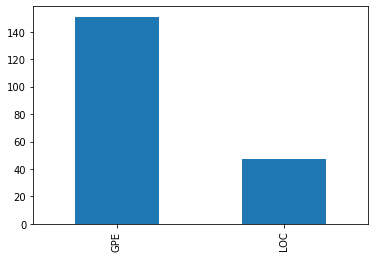

In [ ]:
#NER on 'Title' text
test_data.dropna(subset = ["Title"], inplace=True)
doc_test = list(nlp.pipe(test_data.Title))
#Creating a dataframe with all the annotations from the retrained NER system
cols = ['text', 'start', 'end', 'tag']
lst = []
for doc in doc_test:
  for ent in doc.ents:
    lst.append([ent.text, ent.start_char, ent.end_char, ent.label_])
df1 = pd.DataFrame(lst, columns=cols)
df1.tag.value_counts().plot.bar();

In [ ]:
for doc in doc_test:
  print('Title:', count, colored((doc), 'red' , attrs=['bold']))
  count +=1
  displacy.render(doc, style='ent', jupyter=True)

Title: 100 「東海道五十三次」  「三十八」「藤川」


Title: 101 「東都六玉顔ノ内」  「角田川」


Title: 102 「名所江戸百景」  「猿わか町よるの景」


Title: 103 「江戸名所図会」  「卅二」「三十三間堂」「曽我五郎時宗」


Title: 104  「江戸名所　百人美女」  「今川はし」


Title: 105  「東海道五十三次の内」  「戸塚藤沢間」「吉田橋」「松若」


Title: 106  「江戸名所百人美女」  「今戸」


Title: 107 「東都高名会席尽」  「金子」「助六」


Title: 108  「木曽六十九駅」  「草津」「野路玉川」「清玄尼」


Title: 109  「東海道」  「程ケ谷戸塚間」「権太坂」「いがみ」


Title: 110  ［光氏磯辺遊の図］


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Title: 111  「両国夕景一ツ目千金」


Title: 112 「見立八景之内」  「清水寺の晩鐘」「清玄阿闍梨」「入間の息女桜姫」


Title: 113  「江戸自慢三十六興」  「落合　ほたる」


Title: 114  「曽我八景自筆鏡」  「十郎祐成」「曽我中村」


Title: 115  「東海道五十三次之内」  「御油」「其二」「山本勘助母」


Title: 116  「東海道」  「大津　三井寺」


Title: 117  「王城加茂社風景」


Title: 118   「東海道名所之内」  「深草乃里」「少将つか」「せう／＼さくら」「元政寺」


Title: 119 「東海道名所之内」  「淀川」


Title: 120 「東京三芝居町繁栄之図」


Title: 121 「津島牛頭天王」「舟発場」「佐屋川」「本陣」


Title: 122  「東海道」  「浜松」


Title: 123  「東海道之内」  「岡部」


Title: 124  ［両国大花火夕涼之景］


Title: 125  「東海道名所之内」  「豊川」


Title: 126  ［川口善光寺開帳参詣之図］


Title: 127  「風送幽香」


Title: 128  「東海道」  「島田」


Title: 129   「浅草金竜山之図」 


Title: 130  「東京名所の内」  「浅草区金竜山浅草寺境内一覧」


Title: 131  「しん板車づくし」  「横浜鉄道図」


Title: 132  「東都名所高輪行粧之図」


Title: 133  「東都名所」  「隅田川花盛」


Title: 134  「江戸の花名勝会」  「り」「十番組」「一ツ家の賤の女　尾上菊次郎」「浅茅が原衣掛松」


Title: 135 「江戸の花名勝会」  「ち」「十番組」「一ツ家の姥　市川海老蔵」「猿若芝居町」


Title: 136  「東京三十六景」  「十五」「両国」「十六」「本所一ツ目之橋」


Title: 137  「東京十二月之内」  「二月」「亀井戸天神」「亀井戸梅林」


Title: 138  「東京十二月之内」  「四月」「品川沖之景」


Title: 139  「東京十二月之内」  「六月」「愛宕之景」「神田神社」


Title: 140 「東京開化名所」  「三代徳川家光公」「三河島之景」


Title: 141  「東京名所競」  「上野東照宮」


Title: 142 「東京銘勝会」  「不忍の競馬」


Title: 143  「東海道」  「土山」「鈴ヶ山坂ノ下」


Title: 144 「堀切花菖蒲」


Title: 145  「両国花火之図」


Title: 146  「亀戸梅屋敷」


Title: 147 「東京十二月之内」  「一月」「宮城之春」「九段坂」


Title: 148  「見立十二支」  「丑」「向島」「牛島神社」


Title: 149 「見立十二支」  「辰」「深川八幡」「富士」


Title: 150  「見立十二支」  「酉」「浅草田甫酉の市」


Title: 151  「東海道五拾三次之内」  「大尾」「京師」「三条大橋」


Title: 152  「東海道五拾三次之内」  「日本橋」「行烈振出」


Title: 153  「東海道五拾三次之内」  「四日市」「三重川」


Title: 154  「東海道五拾三次之内」  「大津」「走井茶屋」


Title: 155  「東海道五拾三次之内」  「平塚」「縄手道」


Title: 156  「東海道五拾三次之内」  「土山」「春之雨」


Title: 157  「東海道五拾三次之内」  「日坂」「佐夜ノ中山」


Title: 158  「東海道五拾三次之内」  「庄野」「白雨」


Title: 159  「東都旧跡尽」  「浅草金竜山」「観世音由来」



Title: 160  「江戸名所」  「両国花火」


Title: 161  「江戸名所」  「芝増上寺前の景」


Title: 162  「東都名所」  「新吉原五丁町弥生花盛全図」


Title: 163  「東海道五拾三次之内」  「袋井」「出茶屋ノ図」


Title: 164 ［江都名所浅草観音の図］


Title: 165 「東京市中馬車往来之図」 


Title: 166  ［東京海運橋兜町為換座五階造リ図］


Title: 167 ［久松町劇場久松座繁栄図］


Title: 168  「東京名所」  「スジカイ　万代橋」


Title: 169 「東京名所之内」  「高輪海岸鉄道の図」


Title: 170  「東海道五拾三次之内」  「原」「朝之富士」


Title: 171 「横浜名所図会」  「野毛山下蒸気車」


Title: 172  「東京名所之内」  「上野公園　清水堂」


Title: 173 「東海道五拾三次之内」  「見附」「天竜川図」


Title: 174 「東京開化三十六景」  「柳橋より浅草橋」


Title: 175  「東京名所之内」  「浅草金竜山」


Title: 176 「伊勢名所」「伊勢土産名所図画」  「二見浦之景」「賓日館及海水景」「六」


Title: 177  「大和名所」  「大仏殿」


Title: 178  「大和名所」  「春日神社」「若草山」


Title: 179  「府県名所図会」  「兵庫県」「神戸　布引滝？」「県庁之位地　八部郡神戸」


Title: 180  「神田御社眺望」


Title: 181  「大阪名所」  「桜乃宮より造幣局を望む」「天神橋之図」「造幣局」


Title: 182  「東海道之内」  「関」


Title: 183 「観音霊験記」  「秩父順礼廿九番」「笹の戸　見目山　長泉院」


Title: 184 ［東京三井組ハウス］


Title: 185 「東京名所　浅草観音之図」


Title: 186  「名所江戸百景」  「鎧の渡し　小網町」


Title: 187 「諸国滝廻リ」  「木曽海道　小野ノ瀑布」


Title: 188 「五十三次名所図会」「丗二」  「あら井　渡舟着岸御関所」



Title: 189 「五十三次名所図会　四十」「池鯉鮒　八ツ橋むら　杜若の古せき」 


Title: 190 「五十三次名所図会」「丗八」  「藤川　山中の里別名宮路山」


Title: 191  「川崎」  「神奈川へ二リ半」


Title: 192  「江都名所」  「洲崎しほ干狩」


Title: 193  「諸国名橋奇覧」  「摂州安治川口　天保山」


Title: 194 「東都名所」  「永代橋深川新地」


Title: 195  「五十三次名所図会」「一」  「日本橋　東雲の景」


Title: 196  「五十三次名所図会」「六」  「戸塚　山道より不二眺望」


Title: 197  「富士三十六景」  「東都佃沖」


Title: 198 「江戸名所之内」  「真乳山」


Title: 199  「名所江戸百景」  「千住の大はし」


Title: 200 「諸国名所百景」  「遠州秋葉遠景袋井凧」


# Appendix

## Char2Token
* If needed, labels at the token level

In [ ]:
def label_align_flat(text, doc, annots):
  ents = annots["entities"]
  chars = [ch for ch in text]
  # get the NEs at the char-level
  ents_flat = ["O" for _ in range(len(chars))]
  for start, end, ne in ents:
    for i in range(start, end):
      ents_flat[i] = ne
  token_annots = ["O" for t in doc]
  counter = 0
  for i, token in enumerate(doc):
    if ents_flat[counter] != "O":
      token_annots[i] = ents_flat[counter]
    counter += len(token)
    if counter+1<len(chars):
      if chars[counter+1] == " ":
        counter+=1
  return token_annots


In [ ]:
from spacy.training import Example

In [ ]:
def label_align(text, doc, char_ents):
  chars = [ch for ch in text]
  # get the NEs at the char-level (sanity check)
  ents_flat = ["O" for _ in range(len(chars))]
  for start, end, ne in char_ents:
    for i in range(start, end):
      ents_flat[i] = ne
  token_annots = []
  # for each char-level entity
  for start, end, ne in char_ents:
    counter = 0
    tok_annot = []
    # parse the text tok by tok and (re-) label
    for i, token in enumerate(doc):
      if (start<=counter<end):
        tok_annot.append(i)
      counter += len(token)
      if counter+1<len(chars):
        if chars[counter+1] == " ":
          counter+=1
    token_annots.append((tok_annot[0], tok_annot[0]+1, ne))
  return token_annots

text, annots = TEST_DATA[-2]
doc = nlp.make_doc(text)
ents = label_align(text, doc, annots["entities"])
print(ents)
print(Example.from_dict(doc, {"entities": ents}))